In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
df = pd.read_csv('data/wine.csv')
df.head()

,abv,malic_acid,ash,alcalinity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyacins,color,hue,dilution,proline,wine_type
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


## Regression Analysis
In statistical modeling, regression analysis is a statistical process for estimating the relationships among variables. It includes many techniques for modeling and analyzing several variables, when the focus is on the relationship between a dependent variable and one or more independent variables (or 'predictors'). More specifically, regression analysis helps one understand how the typical value of the dependent variable (or 'criterion variable') changes when any one of the independent variables is varied, while the other independent variables are held fixed. Most commonly, regression analysis estimates the conditional expectation of the dependent variable given the independent variables – that is, the average value of the dependent variable when the independent variables are fixed.


### Linear Regression
In statistics, linear regression is an approach for modeling the relationship between a scalar dependent variable y and one or more explanatory variables (or independent variables) denoted X. The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression. (This term is distinct from multivariate linear regression, where multiple correlated dependent variables are predicted, rather than a single scalar variable.)

In linear regression, the relationships are modeled using linear predictor functions whose unknown model parameters are estimated from the data. Such models are called linear models.

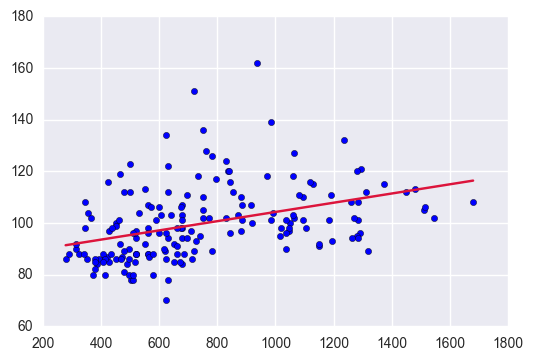

In [3]:
def fitty(x,y,degree):
    # calculate polynomial
    z = np.polyfit(x, y, degree)
    f = np.poly1d(z)

    # calculate new x's and y's
    x_new = np.linspace(x.min(), x.max(), 100)
    y_new = f(x_new)
    
    return x_new, y_new


plt.scatter(df['proline'], df['magnesium'])

reg_line = fitty(df['proline'], df['magnesium'], 1)
plt.plot(reg_line[0], reg_line[1], color='crimson');

__Pearson's R Coefficient__

Pearson's R is a measure of the linear correlation between two variables X and Y, giving a value between +1 and −1 inclusive, where 1 is total positive correlation, 0 is no correlation, and −1 is total negative correlation. It is widely used in the sciences as a measure of the degree of linear dependence between two variables.

In [4]:
r_matrix = np.corrcoef(df['proline'], df['magnesium'])

print(r_matrix[0,1])

0.393350849383


__Guess the Correlation__ 

Play 5 rounds on http://guessthecorrelation.com

## Inferential Statistic
---
__Statistical inference__ is the process of deducing properties of an underlying distribution by analysis of data. Inferential statistical analysis infers properties about a population: this includes testing hypotheses and deriving estimates. The population is assumed to be larger than the observed data set; in other words, the observed data is assumed to be sampled from a larger population. [[Wikipedia](https://en.wikipedia.org/wiki/Descriptive_statistics)]

## T-Test

A t-test can be used to determine if two sets of data are significantly different from each other, and is most commonly applied when the test statistic would follow a normal distribution if the value of a scaling term (the larger the scale parameter, the more spread out the distribution) in the test statistic were known.

### One sample T-Test

Testing the null hypothesis that the population mean is equal to a specified value $\mu_0$.

In [7]:
one_sample = stats.ttest_1samp(df['proline'], 820.)
one_sample[1]

0.0022714484241723857

### Two sample T-Test

Testing the null hypothesis that the population mean of population 1 is equal to the population mean of population 2.

In [8]:
t1 = df['proline'][df['wine_type'] == 1]
t2 = df['proline'][df['wine_type'] == 2]
t3 = df['proline'][df['wine_type'] == 3]

print(len(t1))
print(len(t2))
print(len(t3))

59
71
48


In [9]:
for t in [t1,t2,t3]:
    z, p_val = stats.normaltest(t)

    if p_val < 0.11:
        print('Not normally distributed. P value:', p_val)
    else:
        print('Normally distributed. P value:', p_val)

Normally distributed. P value: 0.727678808281
Not normally distributed. P value: 0.00811698116446
Normally distributed. P value: 0.515800866447


In [10]:
if t1.mean() == t3.mean():
    print('Equal mean:', t1.mean())
else:
    print('Unequal mean:', t1.mean(), t3.mean())
    
if t1.var() == t3.var():
    print('Equal variance:', t1.var())
else:
    print('Unequal variance:', t1.var(), t3.var())

Unequal mean: 1115.71186441 629.895833333
Unequal variance: 49071.4500292 13247.329344


In [11]:
two_sample = stats.ttest_ind(t1, t3)
print('two sample results:', two_sample[1])

# assuming unequal population variances
two_sample_diff_var = stats.ttest_ind(t1, t3, equal_var=False)
print('two sample results with differing variances:', two_sample_diff_var[1])

two sample results: 3.17149992033e-25
two sample results with differing variances: 1.60525601712e-25


### Paired T-Test

The test is used when the samples are dependent; that is, when there is only one sample that has been tested twice (repeated measures) or when there are two samples that have been matched or "paired".

In [12]:
baseline = [67.2, 67.4, 71.5, 77.6, 86.0, 89.1, 59.5, 81.9, 105.5]
follow_up = [62.4, 64.6, 70.4, 62.6, 80.1, 73.2, 58.2, 71.0, 101.0]

paired_sample = stats.ttest_rel(baseline, follow_up)
print('paired T-test result:', paired_sample[1])

paired T-test result: 0.00632665085593


__Mann-Whitney-Wilcoxon Rank Sum Test__

Mann-Whitney $U$ test is a nonparametric test of the null hypothesis that two samples come from the same population against an alternative hypothesis, especially that a particular population tends to have larger values than the other.

Unlike the T-Test it does not require the assumption of normal distributions. It is nearly as efficient as the T-Test on normal distributions.

In [16]:
z_stat, p_val = stats.ranksums(t1, t2) 

print(p_val)

1.53420329556e-21


In [17]:
z_stat, p_val = stats.ranksums(t1, t3) 

print(p_val)

1.52917183906e-17


In [18]:
z_stat, p_val = stats.ranksums(t2, t3) 

print(p_val)

1.36283763887e-05


### ANOVA

Analysis of variance (ANOVA) is a collection of statistical models used to analyze the differences among group means and their associated procedures (such as "variation" among and between groups). In the ANOVA setting, the observed variance in a particular variable is partitioned into components attributable to different sources of variation. In its simplest form, ANOVA provides a statistical test of whether or not the means of several groups are equal, and therefore generalizes the t-test to more than two groups. ANOVAs are useful for comparing (testing) three or more means (groups or variables) for statistical significance. It is conceptually similar to multiple two-sample t-tests, but is less conservative (results in less type I error) and is therefore suited to a wide range of practical problems.

In [26]:
f_val, p_val = stats.f_oneway(df['proline'][df['wine_type'] == 1],
                              df['proline'][df['wine_type'] == 2],
                              df['proline'][df['wine_type'] == 3])

print("One-way ANOVA P =", f_val, p_val)

One-way ANOVA P = 207.920373902 5.78316835611e-47
